## C S 329E HW 11

# Hierarchical Clustering and Cluster Evaluation

## Jenny Fotso and Medhavie Agnihotri Pair 19
This week, let us consider presidential elections of years past and do some exploratory grouping of states based on the 2008,2012, and 2016 presidential elections results.  The data we have is from the [The American Presidency Project](https://www.presidency.ucsb.edu/statistics/elections) and split into two files:

  - `votes_by_state.csv` => has the raw number of ballots cast for each of the top presidential candidates from 2008-2012 by US State (and the District of Columbia)
  - `republican_percentage_by_state.csv` => has the percentage of votes that were for the Republican candidate for 2008, 2012, and 2016 by US State (and the District of Columbia)
  
Our job is to group together states using different hierarchical agglomerative methodologies and compare the results.  You can imagine how finding states that tend to vote similarly to each other might be useful for election predictions, or for identifying swing states as part of a political campaign to invest in.

In [1]:
# Do not modify import block, all necessary imports are included

# Our regular libraries
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

# This is for our hierarchical clustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform

# For our k-means clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples

## Q1 - Using Different Proximity Functions

There is another scientific python library we haven't used much, SciPy, which has [library for hierarchical clustering](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html#scipy.cluster.hierarchy.linkage) and for [plotting dendrograms](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html#scipy.cluster.hierarchy.dendrogram). 

Use these libraries to plot the hierarchical clusters formed from the raw vote count (`votes_by_state.csv`) using three different proximity measures:
  - Ward
  - Min
  - Max
  
The x-axis of the dendrogram should be labeled using the state name (and not the index of the state in the data frame).  The title should reflect what proximity measure you used to create the clusters.  In this use case only the number of votes cast are attributes, and the State names are the labels on that row of data.

Note, to make the plot legible you will have to change the plot size.  I found `figsize=(25,8)` worked well for me, but your mileage may vary depending on your setup. 

In [2]:
# Load the data, save off the state names into another series and just leave the attributes.
df_X = pd.read_csv('https://gist.githubusercontent.com/TieJean/a63b4d51246aec6b73bb75944dd69ead/raw/292d338340efa19b8b47958ee4cfcca5e3d8e09c/votes_by_state.csv')
s_states = df_X['State']
df_X = df_X.drop(columns=['State'])

Text(0, 0.5, 'Proximity')

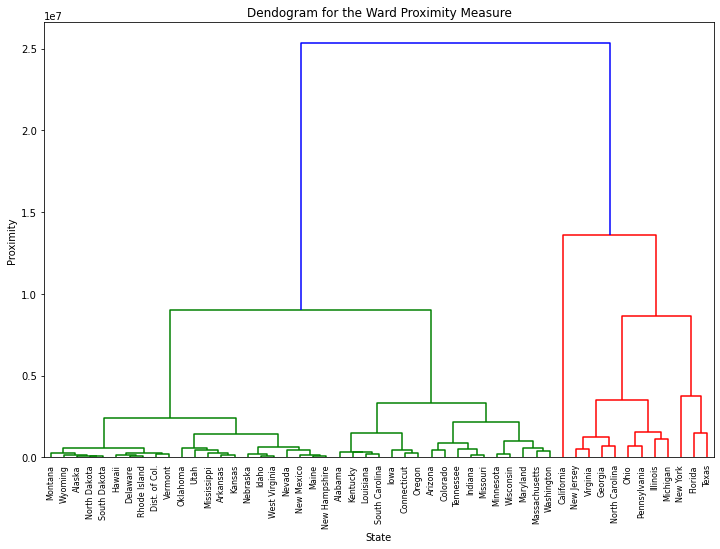

In [3]:
# Plot the dendrogram for the Ward proximity measure
ward = linkage(df_X, "ward")
fig = plt.figure(figsize=(12, 8))
plt.title("Dendogram for the Ward Proximity Measure")
dendrogram(ward, labels=s_states.array, leaf_font_size=8)
plt.xlabel("State")
plt.ylabel("Proximity")

Text(0, 0.5, 'Proximity')

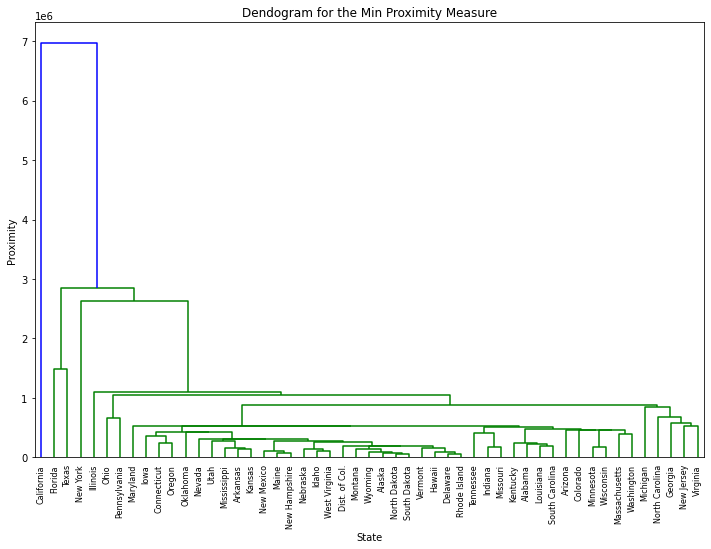

In [4]:
# Plot the dendrogram for the min proximity measure
single = linkage(df_X, "single")
fig = plt.figure(figsize=(12, 8))
plt.title("Dendogram for the Min Proximity Measure")
dendrogram(single, labels=s_states.array, leaf_font_size=8)
plt.xlabel("State")
plt.ylabel("Proximity")

Text(0, 0.5, 'Proximity')

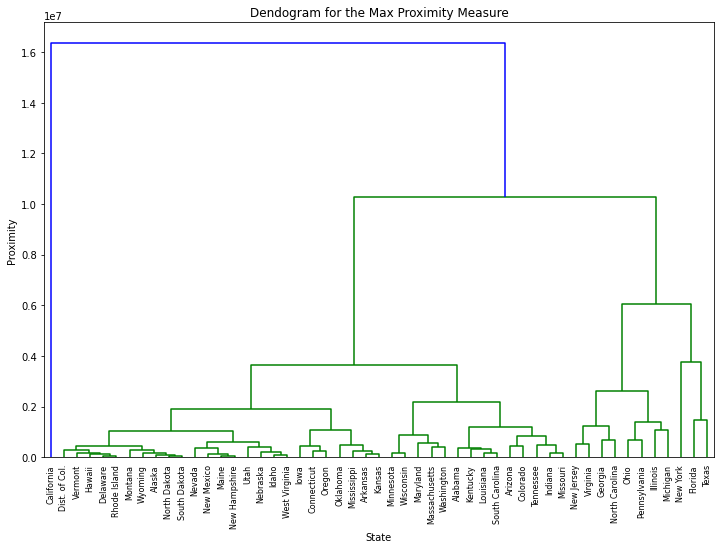

In [5]:
# Plot the dendrogram for the max proximity measure
complete = linkage(df_X, "complete")
fig = plt.figure(figsize=(12, 8))
plt.title("Dendogram for the Max Proximity Measure")
d = dendrogram(complete, labels=s_states.array, leaf_font_size=8)
plt.xlabel("State")
plt.ylabel("Proximity")

## Q2 - Using Different Proximity Functions (part 2)

What is happening?  Even if you aren't a big politics wonk, you might find it strange that New York is closer to Texas than it is to California in all of those graphs!! You may think to yourself, "Self, how could this be?" You also might notice that Montana, Wyoming, and Alaska all tend to cluster together in all of these scenarios. 

At this point, your data science brain might be noticing that the _population_ of that state seems to be more important than which party _won_ the state.  You decide to engineer the data such that you reduce the dimensions down from 7 attributes, to 3 attributes, where each column is the _percentage_ of votes that were cast to the Republican candidate, and a 4th attribute indicating the range of percentages across the 3 elections.  I went ahead and did this for you, and created the file `republican_percentage_by_state.csv`. 

Plot the hierarchical clusters formed from percentage of ballots cast by Republicans (`republican_percentage_by_state.csv`) using three different proximity measures:
  - Ward
  - Min
  - Max
  
The x-axis of the dendrogram should be labeled using the state name (and not the index of the state in the data frame).  The title should reflect what proximity measure you used to create the clusters.  In this use case only the number of votes cast are attributes, and the State names are the labels on that row of data.

Note, to make the plot legible you will have to change the plot size.  I found `figsize=(12,8)` worked well for me, but your mileage may vary depending on your setup. 

In [6]:
# Load the data, save off the state names into another series and just leave the attributes.
df_X = pd.read_csv('https://gist.githubusercontent.com/TieJean/74d13de3875643140d620f0664e1c933/raw/294658528271118725d4b10779cbb430597cf07d/republican_percentage_by_state.csv')
s_states = df_X['State']
df_X = df_X.drop(columns=['State'])

Text(0, 0.5, 'Proximity')

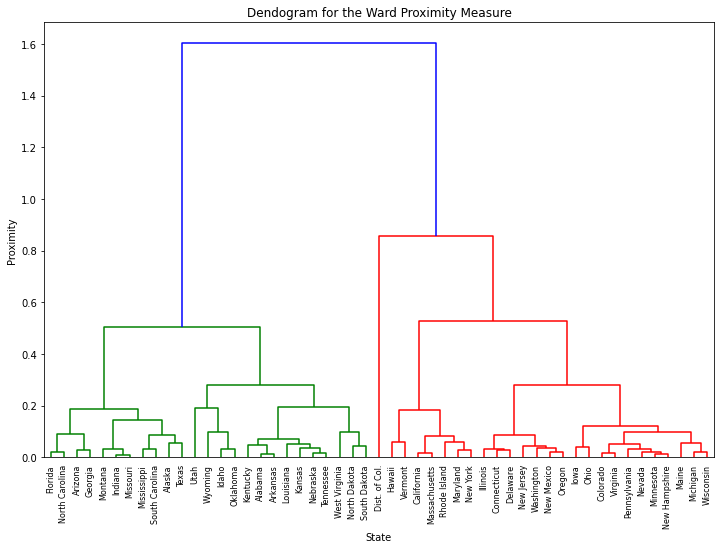

In [7]:
# Plot the dendrogram for the Ward proximity measure
ward = linkage(df_X, "ward")
fig = plt.figure(figsize=(12, 8))
plt.title("Dendogram for the Ward Proximity Measure")
dendrogram(ward, labels=s_states.array, leaf_font_size=8)
plt.xlabel("State")
plt.ylabel("Proximity")

Text(0, 0.5, 'Proximity')

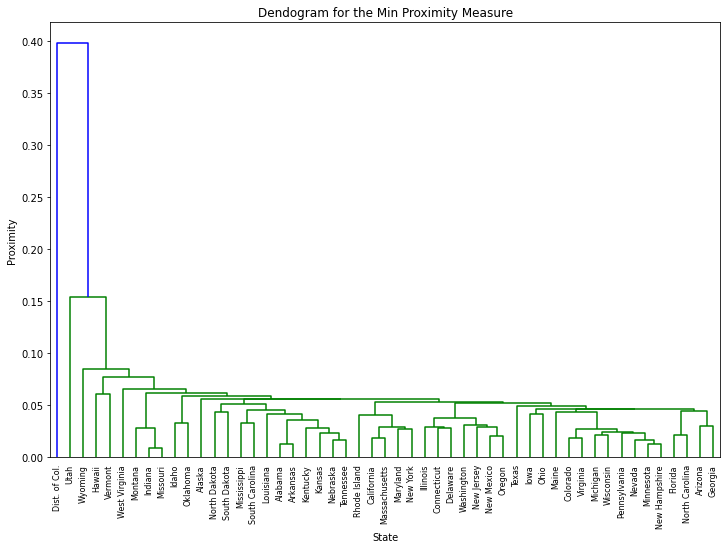

In [8]:
# Plot the dendrogram for the min proximity measure
single = linkage(df_X, "single")
fig = plt.figure(figsize=(12, 8))
plt.title("Dendogram for the Min Proximity Measure")
dendrogram(single, labels=s_states.array, leaf_font_size=8)
plt.xlabel("State")
plt.ylabel("Proximity")

Text(0, 0.5, 'Proximity')

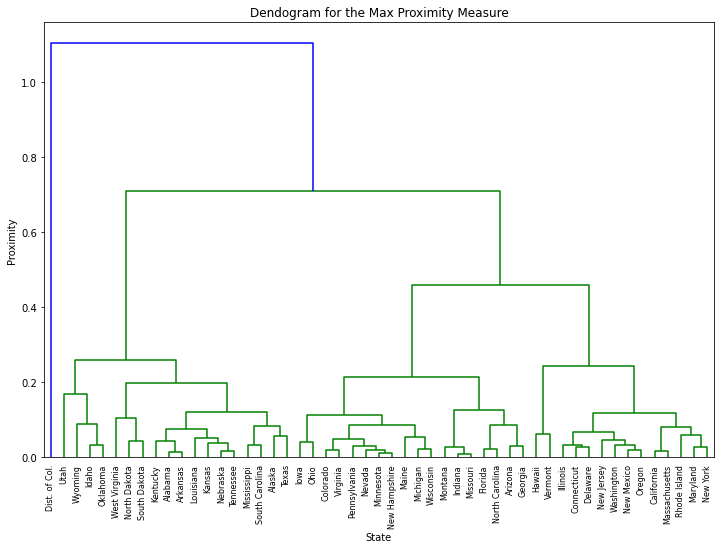

In [9]:
# Plot the dendrogram for the max proximity measure
complete = linkage(df_X, "complete")
fig = plt.figure(figsize=(12, 8))
plt.title("Dendogram for the Max Proximity Measure")
d = dendrogram(complete, labels=s_states.array, leaf_font_size=8)
plt.xlabel("State")
plt.ylabel("Proximity")

## Q3 Calculate the Cophenetic Correlation Coefficient (CPCC)

Using the data from question 2 (creating hierarchical clusters on the percentage of Republican votes), calculate the Cophenetic Correlation Coefficient for each of the three methods.  Display the results, and add a markdown cell explaining how to interpret this metric. You may use the scipy [cophenet function](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.cophenet.html) with the output from  [pdist](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html) function as the `Y` parameter. 

In [10]:
Y =pdist(df_X)
cpcc_ward,cp_ward_mat = cophenet(ward, Y=Y)
cpcc_min,cp_min_mat = cophenet(single, Y=Y)
cpcc_max ,cp_max_mat= cophenet(complete, Y=Y)

In [11]:
# Show the results
(cpcc_ward,cpcc_min,cpcc_max)

(0.5883071696030503, 0.6954635857680919, 0.7406937703705782)

➡️ _your explanation here_ ⬅️

## Q4 Find new Clusters Based on K-Means

A political wonk has come to visit you in your data science dungeon, and looks over your shoulder.  They like what they see, and especially like the patterns from the Ward proximity diagram, and their team is going to come up with 4 different strategies based on the clustering that you have done.  But, your hierarchical clustering didn't come up with a natural 4 clusters! No problem, you decide to use k-means to come up with the 4 clusters.  You choose these points to initialize your cluster centers based on the Ward proximity graph in your hierarchical clusters:

  - Montana
  - Arkansas
  - Massachusetts
  - Minnesota

Pass `random_state = 23` into the [KMeans function](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html).

Print out your centroids before you pass them to K-Means. Print out the States that are in each k-means cluster.

In [12]:
# Find the centroids
centroids = pd.DataFrame(columns=df_X.columns)
centroids = centroids.append([df_X[s_states=="Montana"], df_X[s_states=="Arkansas"], df_X[s_states=="Massachusetts"], df_X[s_states=="Minnesota"]], ignore_index=True)

In [13]:
# Show the centroids
centroids

,2016,2012,2008,range
0,0.575769,0.570342,0.511694,0.064075
1,0.625343,0.621544,0.601717,0.023625
2,0.338355,0.382143,0.368029,0.043788
3,0.471869,0.460588,0.447706,0.024163


In [14]:
# Compute the k-means clusters and show the listing of the States in each cluster
kmeans = KMeans(n_clusters=4, init=centroids,random_state=23).fit(df_X)
statelables = kmeans.labels_
indices0 = [i for i, x in enumerate(statelables) if x == 0]
indices1 = [i for i, x in enumerate(statelables) if x == 1]
indices2 = [i for i, x in enumerate(statelables) if x == 2]
indices3 = [i for i, x in enumerate(statelables) if x == 3]

print('Cluster 1')
print(list(s_states[indices0]))
print()

print('Cluster 2')
print(list(s_states[indices1]))
print()

print('Cluster 3')
print(list(s_states[indices2]))
print()

print('Cluster 4')
print(list(s_states[indices3]))
print()


Cluster 1
['Alaska', 'Arizona', 'Georgia', 'Indiana', 'Kansas', 'Louisiana', 'Mississippi', 'Missouri', 'Montana', 'North Carolina', 'South Carolina', 'South Dakota', 'Texas']

Cluster 2
['Alabama', 'Arkansas', 'Idaho', 'Kentucky', 'Nebraska', 'North Dakota', 'Oklahoma', 'Tennessee', 'Utah', 'West Virginia', 'Wyoming']

Cluster 3
['California', 'Dist. of Col.', 'Hawaii', 'Maryland', 'Massachusetts', 'New York', 'Rhode Island', 'Vermont']

Cluster 4
['Colorado', 'Connecticut', 'Delaware', 'Florida', 'Illinois', 'Iowa', 'Maine', 'Michigan', 'Minnesota', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'Ohio', 'Oregon', 'Pennsylvania', 'Virginia', 'Washington', 'Wisconsin']



/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_kmeans.py:1149: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


## Q5 Visualize the Silhouette Coefficients for Each Cluster

Using the [Silhouette Coefficient](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_samples.html) implementation in sci-kit learn, calculate the silhouette coefficient for each of the States in our data frame using the clustering from Q4, and create a bar graph, similar to the [left plot in this link](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html).

Use the Silhouette Coefficient plot to identify clusters that have outliers.  Find the data points that are outliers and then describe in a markdown cells how the visualization helped you identify the outlier points.  

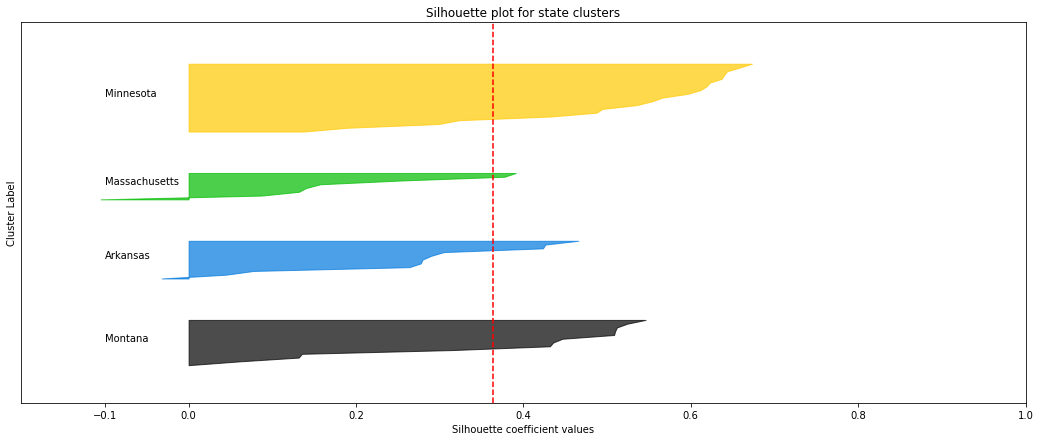

In [15]:
n_clusters = 4
statescentroid = ['Montana', 'Arkansas', 'Massachusetts','Minnesota']

# Create a subplot with 1 row and 2 columns
fig, (ax1) = plt.subplots(1, 1)
fig.set_size_inches(18, 7)

# The 1st subplot is the silhouette plot
# The silhouette coefficient can range from -1, 1 but in this example all
# lie within [-0.2, 1]
ax1.set_xlim([-0.2, 1])
# The (n_clusters+1)*10 is for inserting blank space between silhouette
# plots of individual clusters, to demarcate them clearly.
ax1.set_ylim([0, len(df_X) + (n_clusters + 1) * 10])



# Initialize the clusterer with n_clusters value and a random generator
# seed of 10 for reproducibility.

# The silhouette_score gives the average value for all the samples.
# This gives a perspective into the density and separation of the formed
# clusters
sample_silhouette_values = silhouette_samples(df_X, statelables)

y_lower = 10
for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = sample_silhouette_values[statelables == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        facecolor=color,
        edgecolor=color,
        alpha=0.7,
    )

   # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.1, y_lower + 0.5 * size_cluster_i, str(statescentroid[i]))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("Silhouette plot for state clusters")
    ax1.set_xlabel("Silhouette coefficient values")
    ax1.set_ylabel("Cluster Label")

    # The vertical line for average silhouette score of all the values

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.axvline(x=np.average(sample_silhouette_values), color="red", linestyle="--")

plt.show()

In [16]:
outliers = sample_silhouette_values[sample_silhouette_values<0]
outlier1 = np.where(sample_silhouette_values==outliers[0])[0][0]
outlier2 = np.where(sample_silhouette_values==outliers[1])[0][0]
print("Outlier States")
print("--------------")
print(s_states[outlier1])
print(s_states[outlier2])

Outlier States
--------------
Nebraska
Rhode Island


➡️ _description of the graph, and how you used it to detect outliers, and what the outliers you found are (tell me the specific states)_ ⬅️

The graph above shows that Nebraska and Rhode Island have negative sillouhette coefficients indicating that they are outliers.